In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Populating the interactive namespace from numpy and matplotlib


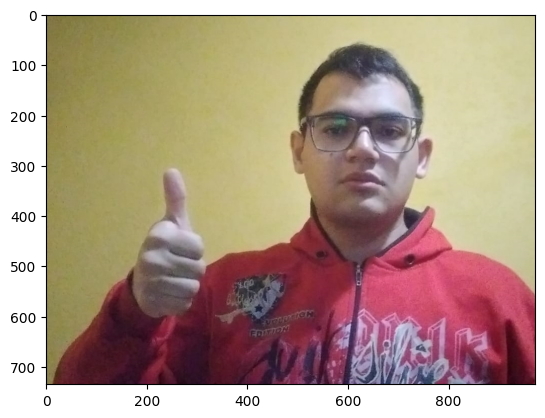

In [3]:
%pylab inline
import matplotlib.pyplot as plt
from torchvision.io import read_image
img = read_image('/content/drive/MyDrive/Proyecto-Integrador-Redes/Dataset/Letras/Imagen_LetraA4.jpg')
imgplot = plt.imshow(img.permute(1,2,0))
plt.show()

In [4]:
import torch
import torchvision.transforms as T
from torchvision.transforms import v2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision import tv_tensors
import numpy as np
import pandas as pd

#Mostrar Imagen con bbox
def plot_image_with_bbox(img, bbox, title=""):
    img_np = img.permute(1, 2, 0).numpy()  # Convertir a numpy [H, W, C]
    fig, ax = plt.subplots(1)
    ax.imshow(img_np)

    # Convertir de centro, ancho, alto a coordenadas de esquina superior izquierda
    cx, cy, width, height = bbox
    x1 = cx - width / 2
    y1 = cy - height / 2

    # Crear el rectángulo con las nuevas coordenadas
    rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    plt.title(title)
    plt.axis("off")
    plt.show()

In [5]:
import torch
import pandas as pd
import json

# Cargar el archivo CSV
labels = pd.read_csv("/content/drive/MyDrive/Proyecto-Integrador-Redes/Dataset/Letras_Gonza.csv")
labels

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,Imagen_LetraA4.jpg,121613,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":157,""y"":304,""width"":192,""he...","{""Label"":""A""}"
1,Imagen_LetraA5.jpg,97721,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":72,""y"":400,""width"":212,""hei...","{""Label"":""A""}"
2,Imagen_LetraA6.jpg,112027,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":45,""y"":232,""width"":201,""hei...","{""Label"":""A""}"
3,Imagen_LetraB4.jpg,149394,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":35,""y"":292,""width"":217,""hei...","{""Label"":""B""}"
4,Imagen_LetraB5.jpg,89571,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":147,""y"":327,""width"":275,""he...","{""Label"":""B""}"
...,...,...,...,...,...,...,...
91,Imagen_LetraY7.jpg,127888,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":406,""y"":194,""width"":329,""he...","{""Label"":""Y""}"
92,Imagen_LetraY8.jpg,120170,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":363,""y"":210,""width"":337,""he...","{""Label"":""Y""}"
93,Imagen_LetraZ5.jpg,131064,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":269,""y"":226,""width"":246,""he...","{""Label"":""Z""}"
94,Imagen_LetraZ6.jpg,123151,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":260,""y"":287,""width"":315,""he...","{""Label"":""Z""}"


In [9]:
# Convertir la columna 'region_shape_attributes' de JSON a diccionario y extraer las coordenadas
bbox_tensors = []
for _, row in labels.iterrows():
    # Convertir la cadena JSON en un diccionario
    region_shape = json.loads(row['region_shape_attributes'])
    region_att = json.loads(row['region_attributes'])

    # Extraer las coordenadas de x, y, width y height
    letra, x, y, width, height = region_att["Label"], region_shape["x"], region_shape["y"], region_shape["width"], region_shape["height"]
    # Convertir a tensor
    bbox_tensor = [letra, torch.tensor([x+ width/2 , y+height/2 , width , height ], dtype=torch.float32)]
    bbox_tensors.append(bbox_tensor)

# Ejemplo de uso: mostrar los primeros bounding boxes como tensores
for bbox in bbox_tensors:
    print(bbox)

['A', tensor([253., 456., 192., 304.])]
['A', tensor([178.0000, 557.5000, 212.0000, 315.0000])]
['A', tensor([145.5000, 398.5000, 201.0000, 333.0000])]
['B', tensor([143.5000, 561.0000, 217.0000, 538.0000])]
['B', tensor([284.5000, 597.5000, 275.0000, 541.0000])]
['B', tensor([549., 725., 198., 420.])]
['C', tensor([359.5000, 549.5000, 331.0000, 365.0000])]
['C', tensor([184.5000, 563.5000, 341.0000, 351.0000])]
['C', tensor([408., 619., 376., 382.])]
['D', tensor([491.5000, 669.5000, 309.0000, 357.0000])]
['D', tensor([285.5000, 571.5000, 353.0000, 501.0000])]
['D', tensor([359.5000, 639.0000, 307.0000, 438.0000])]
['E', tensor([550.5000, 426.0000, 321.0000, 242.0000])]
['E', tensor([584.5000, 451.5000, 321.0000, 281.0000])]
['E', tensor([506.5000, 436.0000, 327.0000, 262.0000])]
['F', tensor([797.0000, 771.5000, 436.0000, 311.0000])]
['F', tensor([792.0000, 783.5000, 462.0000, 271.0000])]
['F', tensor([783.5000, 711.5000, 363.0000, 333.0000])]
['G', tensor([444., 583., 218., 424.])]


tensor([145.5000, 398.5000, 201.0000, 333.0000])

In [7]:
plot_image_with_bbox(img, E_bbox)

NameError: name 'E_bbox' is not defined

In [8]:
transform = v2.Compose([
    v2.RandomRotation(20),
    v2.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
])
#Creo el bounding box
bb_E = tv_tensors.BoundingBoxes(E_bbox, format="CXCYWH", canvas_size=(img.shape[1], img.shape[2]))
#se transforman la imagen y el box juntos
aug_img, aug_E = transform(img, bb_E)
#Squeeze para que sea un arreglo y poder graficarlo, BoundingBoxes agrega una dimension (tal vez espera múltiples boxes)
aug_E = aug_E.squeeze(0)

print(bb_E)
print(aug_E)

plot_image_with_bbox(aug_img, aug_E)


NameError: name 'E_bbox' is not defined